In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

import torchvision.transforms.v2 as transforms

from inference import get_similar_garments

In [2]:
DRESSCODE_ROOT = "data/DressCode"

DIRECTORY_MAP = ["upper_body", "lower_body", "dresses"]

data = pd.read_csv(os.path.join(DRESSCODE_ROOT, "test_pairs_paired_cropped.txt"), delimiter="\t", header=None, names=["model", "garment", "label"])

In [3]:
j = 0


0: 640x576 1 long sleeve top, 1 trousers, 72.4ms
Speed: 1.8ms preprocess, 72.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 576)


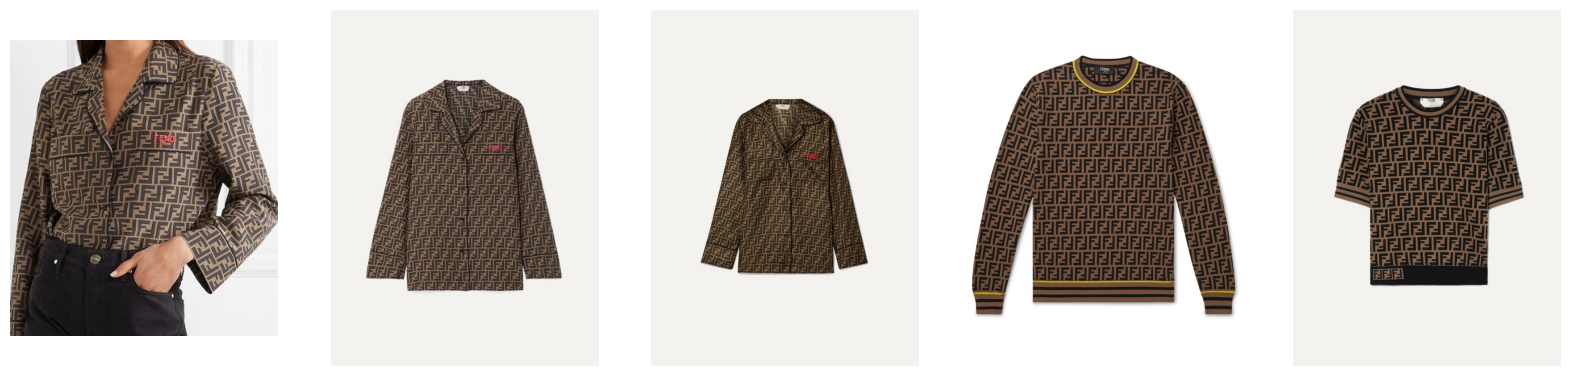

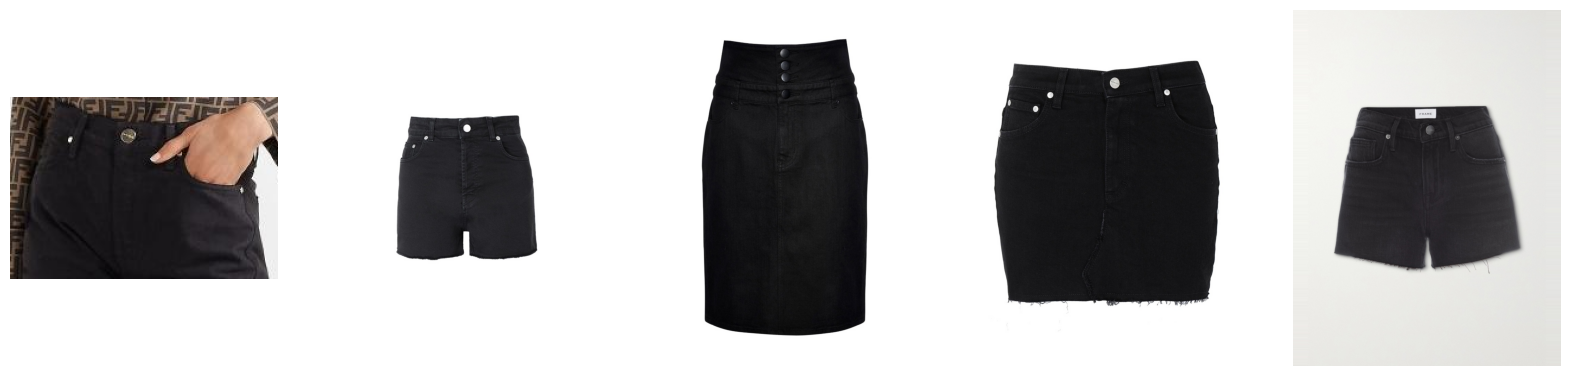

In [23]:
model, garment, label = data.iloc[j]

image = Image.open(os.path.join(DRESSCODE_ROOT, DIRECTORY_MAP[label], "cropped_images", model))
min_confidence = 0.5

detections = get_similar_garments(image, min_confidence)

for detection in detections:
    bounding_box, class_name, similar_garments, _ = detection.values()

    fig, ax = plt.subplots(1, 5, figsize=(20, 10))

    ax[0].imshow(image.crop(bounding_box))
    ax[0].axis("off")

    for i, similar_image in enumerate(similar_garments):
        ax[i + 1].imshow(similar_image)
        ax[i + 1].axis("off")

j += 1